In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

<AxesSubplot:xlabel='x1', ylabel='x2'>

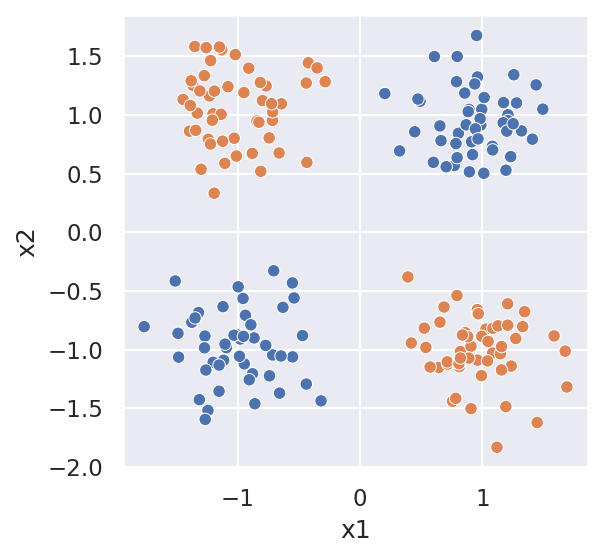

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = [50, 50, 50, 50], n_features = 2, random_state = 0, centers = ((-1, -1), (-1, 1), (1, -1), (1, 1)), cluster_std = 0.3)
df = pd.DataFrame(data = x, columns = ["x1", "x2"])
df["y"] = y
df = df.replace(3, 0)
df = df.replace(2, 1)
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

In [3]:
from sklearn.neural_network import MLPClassifier
neural_network_3_1 = MLPClassifier(hidden_layer_sizes = (3), activation = 'logistic', 
                                   solver = 'lbfgs', random_state = 22)

In [4]:
neural_network_3_1.fit(df[["x1", "x2"]], df["y"])

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=22,
              solver='lbfgs')

In [5]:
from matplotlib.colors import ListedColormap
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

<AxesSubplot:xlabel='fare', ylabel='age'>

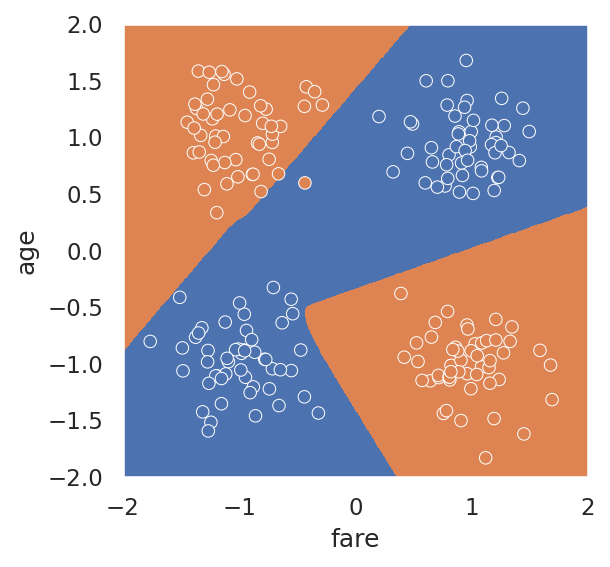

In [6]:
visualize_decision_boundaries(neural_network_3_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

In [7]:
r_channel = np.linspace(0.298, 0.8667, 50)
g_channel = np.linspace(0.4471, 0.5176, 50)
b_channel = np.linspace(0.6902, 0.3216, 50)
blue_to_orange_cmap = np.vstack((r_channel, g_channel, b_channel)).T
listed_blue_to_orange_cmap = ListedColormap(np.array(blue_to_orange_cmap))

def visualize_activations(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=listed_blue_to_orange_cmap)
    plt.xlabel("fare")
    plt.ylabel("age") 

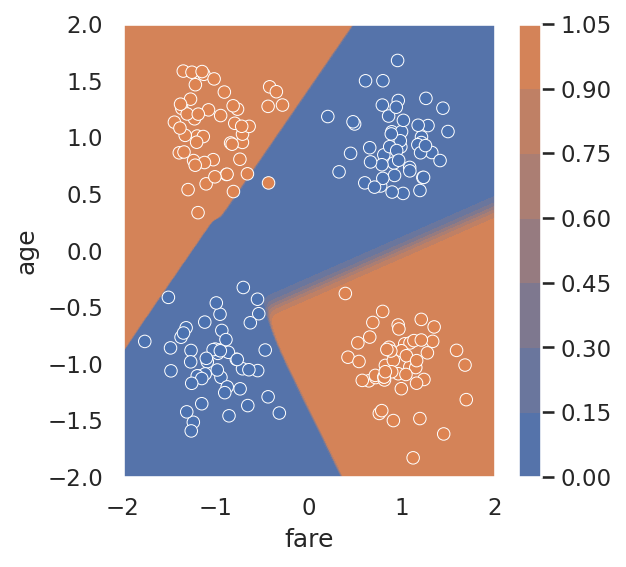

In [8]:
visualize_activations(neural_network_3_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.colorbar()

The code below lets us see the coefficients of the first layer of the neural network. There are 2 coefficients for each neuron, one for the fare, and one for the age. Since there are 3 total neurons in the first layer, that makes 3 * 2 = 6 coefficients.

In [10]:
neural_network_3_1.coefs_[0]

array([[-94.71601811, -31.29037163, -29.68000799],
       [ 66.5026335 ,  33.64604212,  28.8104855 ]])

We can manually compute the activation of each neuron using the sigma function.

In [11]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

Below we see the output of each neuron for each observation. Note taht most of them are 0 or 1.

In [12]:
first_layer_output = sigma(df[["x1", "x2"]] @ neural_network_3_1.coefs_[0] + neural_network_3_1.intercepts_[0])
first_layer_output

,0,1,2
0,1.000000e+00,5.350373e-32,1.530443e-06
1,1.000000e+00,2.391187e-19,9.994509e-01
2,1.000000e+00,2.581690e-15,1.000000e+00
3,1.000000e+00,1.000000e+00,1.000000e+00
4,1.000000e+00,1.000000e+00,1.000000e+00
...,...,...,...
195,1.000000e+00,8.003611e-17,9.999973e-01
196,1.000000e+00,1.075907e-07,1.000000e+00
197,1.084003e-67,1.027610e-58,1.236505e-31
198,1.000000e+00,2.416564e-15,1.000000e+00


Or below we can see each observation along with the output of each neuron.

In [13]:
df_with_first_layer_output = pd.concat([df, first_layer_output], axis=1)
df_with_first_layer_output

,x1,x2,y,0,1,2
0,-0.319074,-1.436310,0,1.000000e+00,5.350373e-32,1.530443e-06
1,1.082355,0.732725,0,1.000000e+00,2.391187e-19,9.994509e-01
2,-0.980045,-0.909258,0,1.000000e+00,2.581690e-15,1.000000e+00
3,-1.367631,1.253309,1,1.000000e+00,1.000000e+00,1.000000e+00
4,-1.241023,0.793135,1,1.000000e+00,1.000000e+00,1.000000e+00
...,...,...,...,...,...,...
195,0.964551,0.795947,0,1.000000e+00,8.003611e-17,9.999973e-01
196,-1.489060,-0.861165,0,1.000000e+00,1.075907e-07,1.000000e+00
197,1.448345,-1.620996,1,1.084003e-67,1.027610e-58,1.236505e-31
198,-0.953516,-0.886551,0,1.000000e+00,2.416564e-15,1.000000e+00


The functions below let us visualize the output of each neuron.

In [14]:
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age") 

In [15]:
class SigmoidalNeuron():
    def __init__(self, weights, intercept):
        self.weights = weights
        self.intercept = intercept
        
    def sigma(x):
        return 1 / (1 + np.exp(-x))
        
    def predict_proba(self, x):
        pclass0 = 1 - sigma(np.sum(self.weights * x, axis = 1) + self.intercept)
        pclass1 = sigma(np.sum(self.weights * x, axis = 1) + self.intercept)
        return np.vstack([pclass0, pclass1]).T
        
    
    def predict(self, x):
        return 1 * (self.predict_proba(x)[:, 1] > 0.5)

In [17]:
np.sum(neural_network_3_1.coefs_[0][:, 0] * np.array([[3, 5], [2, 4], [1, 7]]), axis = 1)

array([ 48.36511318,  76.57849779, 370.80241642])

In [19]:
h1 = SigmoidalNeuron(neural_network_3_1.coefs_[0][:, 0], neural_network_3_1.intercepts_[0][0])

Below we see the decision boundaries of the top left neuron.

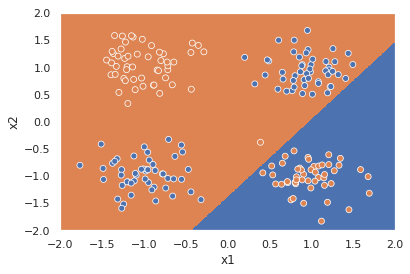

In [20]:
visualize_decision_boundaries(h1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

In [9]:
def plot_sigmoidal_neuron_decision_boundaries(coefs, intercepts, name):
    sn = SigmoidalNeuron(coefs, intercepts)
    visualize_decision_boundaries(sn, [-2, 2], [-2, 2])
    sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
    #plt.savefig(name, dpi = 300, bbox_inches = "tight") # used for making slides for the lecture

Below we see the decision boundaries of the middle neuron.

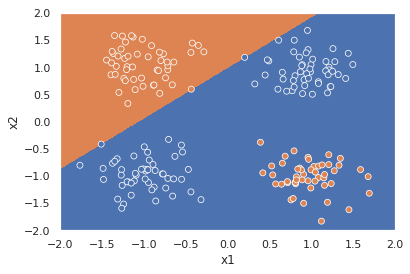

In [24]:
plot_sigmoidal_neuron_decision_boundaries(neural_network_3_1.coefs_[0][:, 1], neural_network_3_1.intercepts_[0][1],
                                         'network31_middleleft_neuron.png')

And below, the decision boundaries of the bottom neuron.

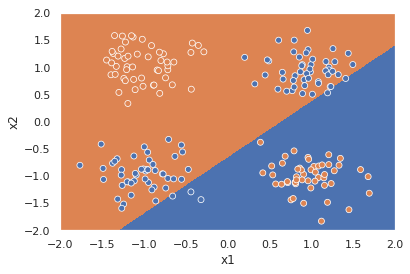

In [25]:
plot_sigmoidal_neuron_decision_boundaries(neural_network_3_1.coefs_[0][:, 2], neural_network_3_1.intercepts_[0][2],
                                         'network31_bottomleft_neuron.png')

We can also look at the raw output of the neurons using the function below.

In [10]:
def plot_sigmoidal_neuron_activations(coefs, intercepts, name):
    sn = SigmoidalNeuron(coefs, intercepts)
    visualize_activations(sn, [-2, 2], [-2, 2])
    sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
    # plt.savefig(name, dpi = 300, bbox_inches = "tight") # commented out, used for generating figures for lecture video

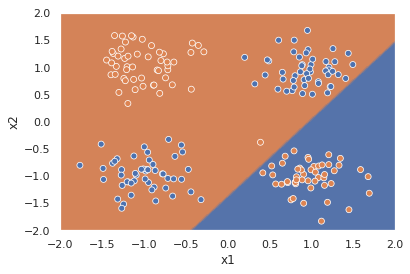

In [28]:
plot_sigmoidal_neuron_activations(neural_network_3_1.coefs_[0][:, 0], neural_network_3_1.intercepts_[0][0],
                                 'network31_topleft_neuron.png')

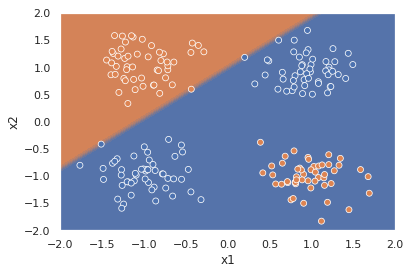

In [29]:
plot_sigmoidal_neuron_activations(neural_network_3_1.coefs_[0][:, 1], neural_network_3_1.intercepts_[0][1],
                                 'network31_middleleft_neuron.png')

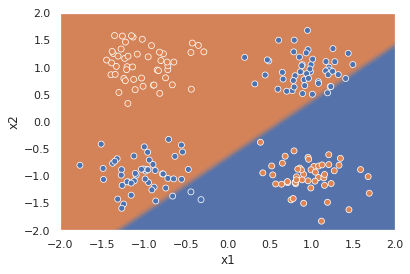

In [30]:
plot_sigmoidal_neuron_activations(neural_network_3_1.coefs_[0][:, 2], neural_network_3_1.intercepts_[0][2],
                                 'network31_bottomleft_neuron.png')

Below, we see all 9 coefficients of the network: The 6 coefficients from earlier, and the coefficient for the output of each of the first layers' neurons. 

In [31]:
neural_network_3_1.coefs_

[array([[-94.71601811, -31.29037163, -29.68000799],
        [ 66.5026335 ,  33.64604212,  28.8104855 ]]), array([[-22.35680633],
        [ 30.58307533],
        [-13.97799353]])]

Below we fit another neural network, this time with a different "random_state". Every time you fit a neural network, you'll end up with different coefficients, i.e. the network training process is non-deterministic. By setting the random_state, we're setting the seed for the random number generater used by the training process.

In [12]:
from sklearn.neural_network import MLPClassifier
neural_network_3_1_again = MLPClassifier(hidden_layer_sizes = (3), activation = 'logistic', 
                                    solver = 'lbfgs', random_state = 7)

neural_network_3_1_again.fit(df[["x1", "x2"]], df["y"])

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=7,
              solver='lbfgs')

This time, we see the output of the network is different than before.

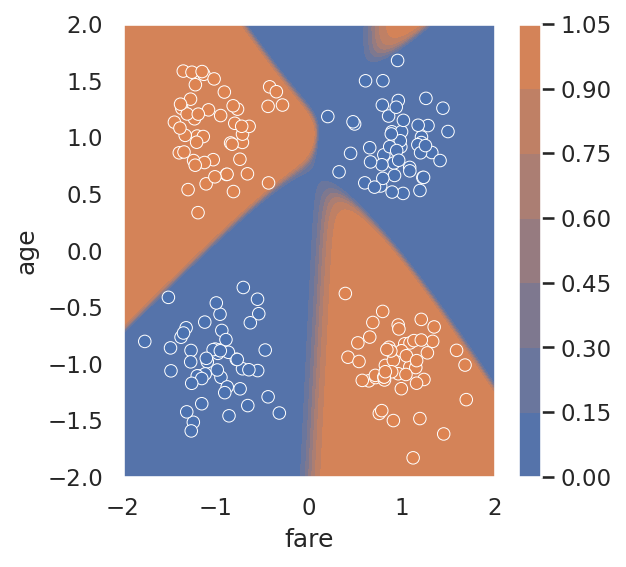

In [13]:
visualize_activations(neural_network_3_1_again, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.colorbar()
#plt.savefig('network31_activation_again.png', dpi = 300, bbox_inches = "tight")

We also see the the activation of each of the neurons is different than before.

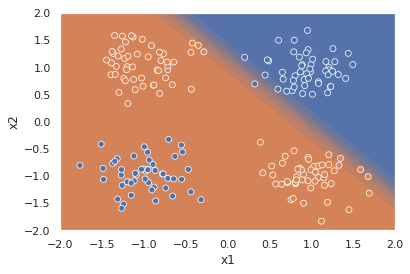

In [34]:
plot_sigmoidal_neuron_activations(neural_network_3_1_again.coefs_[0][:, 0], neural_network_3_1_again.intercepts_[0][0],
                                 'network31_again_topleft_neuron.png')

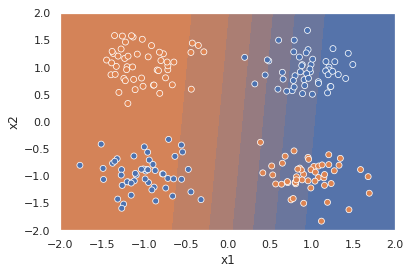

In [35]:
plot_sigmoidal_neuron_activations(neural_network_3_1_again.coefs_[0][:, 1], neural_network_3_1_again.intercepts_[0][1],
                                 'network31_again_middleleft_neuron.png')

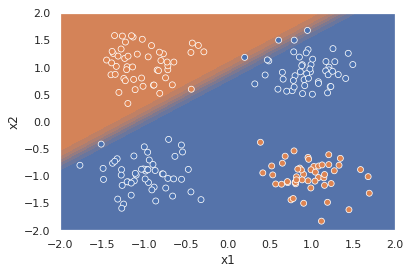

In [36]:
plot_sigmoidal_neuron_activations(neural_network_3_1_again.coefs_[0][:, 2], neural_network_3_1_again.intercepts_[0][2],
                                 'network31_again_bottomleft_neuron.png')

Below, we train a model with 3 hidden layers. One with 3 neurons, one with 4 neurons, and one with 2 neurons.

In [316]:
from sklearn.neural_network import MLPClassifier
neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'logistic', 
                                       solver = 'lbfgs')
neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

The output of this model seems to fit the data much better.

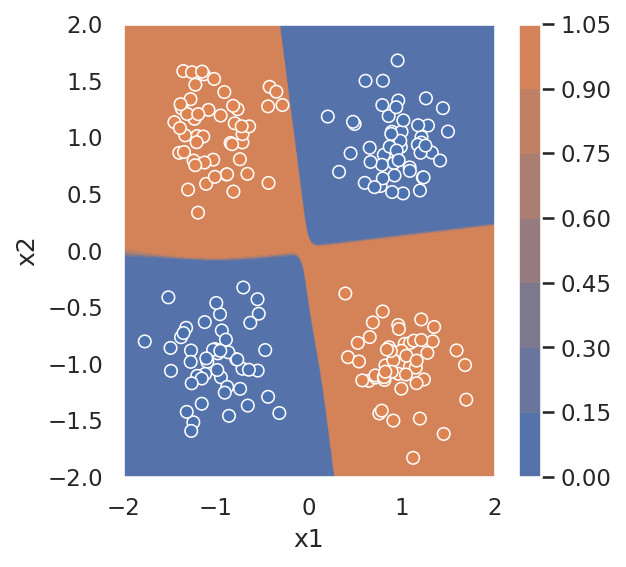

In [318]:
from sklearn.neural_network import MLPClassifier
neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'logistic', 
                                       solver = 'lbfgs', random_state = 28)
neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
visualize_activations(neural_network_3_4_2_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.colorbar()
plt.savefig('network3421_rs28.png', dpi = 300, bbox_inches = "tight")

But if we train the same xact model again but with a different random state, we might get results that aren't quite as nice.

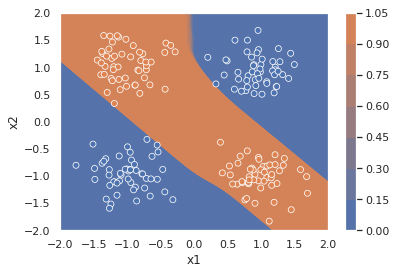

In [42]:
from sklearn.neural_network import MLPClassifier
neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'logistic', 
                                       solver = 'lbfgs', random_state = 9)
neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
visualize_activations(neural_network_3_4_2_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.colorbar()
#plt.savefig('network3421_rs9.png', dpi = 300, bbox_inches = "tight")

Yet one more time, and this time we get a model that doesn't do very well with the data at all. The issue is that we got unlucky with our random seed.

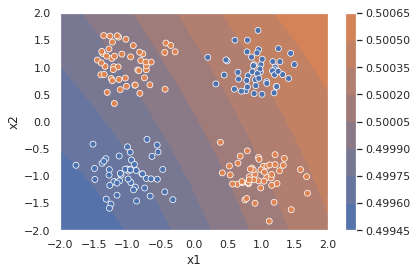

In [43]:
from sklearn.neural_network import MLPClassifier
neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'logistic', 
                                       solver = 'lbfgs', random_state = 11)
neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
visualize_activations(neural_network_3_4_2_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.colorbar()
#plt.savefig('network3421_rs11.png', dpi = 300, bbox_inches = "tight")

Below we see the results for the hyperbolic tangent activation function as opposed to the sigmoidal activation function.

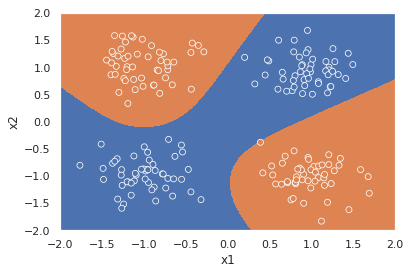

In [314]:
from sklearn.neural_network import MLPClassifier
neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'tanh')
neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
visualize_decision_boundaries(neural_network_3_4_2_1, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

plt.savefig('network3421_rs28.png', dpi = 300, bbox_inches = "tight")

The two activation functions are shown below.

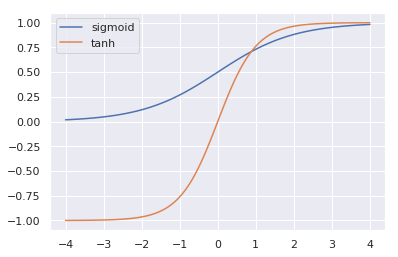

In [47]:
x = np.linspace(-4, 4, 100)
y_sigma = sigma(x)
y_tanh = np.tanh(x)
plt.plot(x, y_sigma)
plt.plot(x, y_tanh)
plt.legend(['sigmoid', 'tanh'])
#plt.savefig('sigmoid_vs_tanh.png', dpi = 300, bbox_inches = "tight")

To explore the results of various random seeds, I created the function below.

In [57]:
def train_tanh_3421_network(rs):
    neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'relu', 
                                           solver = 'lbfgs')
    neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
    
    visualize_activations(neural_network_3_4_2_1, [-2, 2], [-2, 2])
    sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
    plt.colorbar()
    plt.savefig(f'network3421_tanh_rs{rs}.png', dpi = 300, bbox_inches = "tight")

Seed 9 looks pretty good.

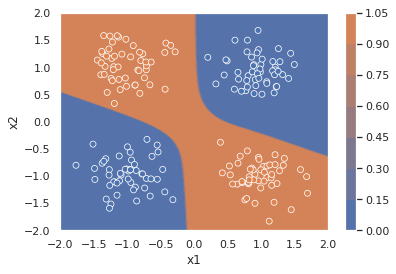

In [58]:
train_tanh_3421_network(9)

Seed 10 also looks pretty good, though a little weird.

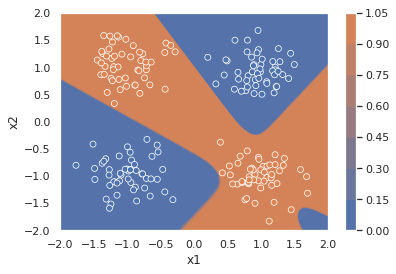

In [59]:
train_tanh_3421_network(10)

Seed 20 looks pretty good.

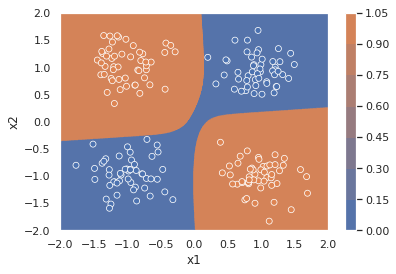

In [60]:
train_tanh_3421_network(20)

Seed 30 is pretty bad.

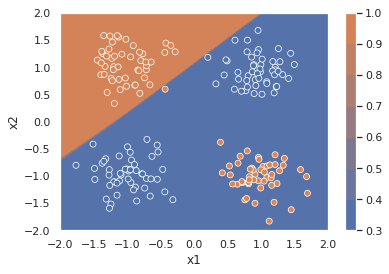

In [61]:
train_tanh_3421_network(30)

Overall, hyperbolic tangent did a bit better on this data than sigmoids. 

Other activation functions are possible, for example, relu, shown below.

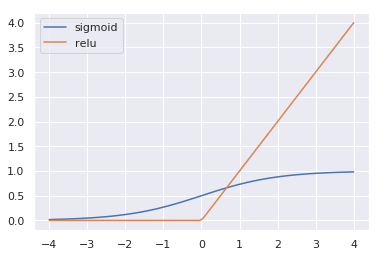

In [67]:
x = np.linspace(-4, 4, 100)
y_sigma = sigma(x)
y_tanh = np.tanh(x)
plt.plot(x, y_sigma)
plt.plot(x, x - (x <= 0)*x)
plt.legend(['sigmoid', 'relu'])
plt.savefig('sigmoid_vs_relu.png', dpi = 300, bbox_inches = "tight")

To explore how relu behaves, I define the following function.

In [78]:
def train_relu_3421_network(rs):
    neural_network_3_4_2_1 = MLPClassifier(hidden_layer_sizes = (3, 4, 2), activation = 'relu', 
                                       max_iter = 10000, solver = 'lbfgs', random_state = rs)
    neural_network_3_4_2_1.fit(df[["x1", "x2"]], df["y"])
    visualize_activations(neural_network_3_4_2_1, [-2, 2], [-2, 2])
    sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
    plt.colorbar()
    plt.savefig(f'network3421_relu_rs{rs}.png', dpi = 300, bbox_inches = "tight")

We see from the figure below that relu deicison boundaries are straight lines.

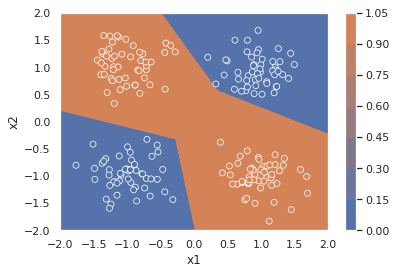

In [98]:
train_relu_3421_network(56)

Seed 56 above was pretty good, but 62 below is bad.

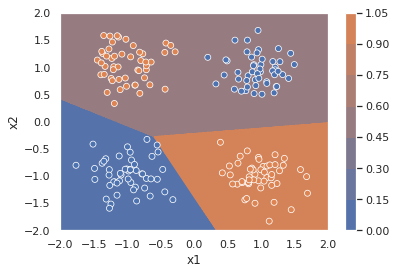

In [99]:
train_relu_3421_network(62)

Seed 37 is pretty bad.

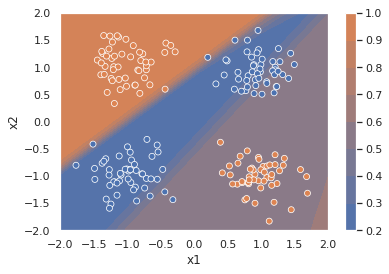

In [100]:
train_relu_3421_network(37)

Seed 5 is pretty bad.

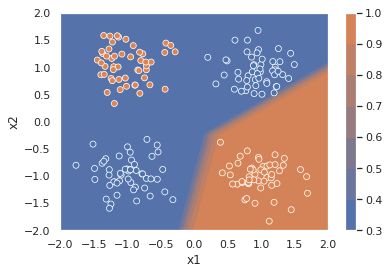

In [101]:
train_relu_3421_network(5)

Now we turn to higher dimensional data and try to compare the results for all of the classifiers we've seen in the class so far.

In [111]:
df = sns.load_dataset("titanic")
df = df[["age", "fare", "pclass", "sex", "survived"]]
df = df.dropna()
df['sex'] = df['sex'].replace("male", 0)
df['sex'] = df['sex'].replace("female", 1)
np.random.seed(23)
df_train, df_test = np.split(df, [600])

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


all_models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': Pipeline([        
        ('scale', StandardScaler()),        
        ('model', LogisticRegression())
    ]),
    'KNearestNeighbors': KNeighborsClassifier(),
    'SVM': SVC(kernel = "linear"),
    'MLPClassifier': Pipeline([
        ('scale', StandardScaler()),
        ('model', MLPClassifier(max_iter = 10000, solver = 'lbfgs'))
    ])
}

all_params = {
    'RandomForest':{ 
            "n_estimators"         : [50, 100, 200],
            'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]
            },
    'DecisionTree': {
        'min_impurity_decrease'    : [0, 0.01, 0.02, 0.05, 0.1]
        },
    'LogisticRegression' : {
        'model__C'                 : 10**np.linspace(-7, 5, 100)
        },
    'SVM': {
        'C' : 10**np.linspace(-3, 2, 5)
    },
    'KNearestNeighbors' : {
        'n_neighbors'              : [3, 4, 5, 8, 10]
    },
    'MLPClassifier' : {
        'model__hidden_layer_sizes' : [(3, 1), (3, 4, 2), (3, 3, 3)],
        'model__activation' : ['relu', 'logistic', 'tanh']
    }
}

The accuracy of our models is given below.

In [133]:
for name in all_models.keys():
    model = all_models[name]
    params = all_params[name]
    gscv = GridSearchCV(estimator = model, param_grid = params, cv = 10)
    gscv.fit(df_train[["fare", "age", "pclass",  "sex"]], 
             df_train["survived"])
    print(f"best parameters are: {gscv.best_estimator_}")
    print(f"cross validation accuracy is: {gscv.best_score_}")   
    test_accuracy = accuracy_score(gscv.predict(df_test[["fare", "age", "pclass",  "sex"]]), df_test["survived"])
    print(f"hidden test set accuracy is: {test_accuracy}")    

best parameters are: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
cross validation accuracy is: 0.7916666666666666
hidden test set accuracy is: 0.7894736842105263
best parameters are: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
          

/home/hug/miniconda3/envs/data100/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


best parameters are: Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 MLPClassifier(activation='logistic', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(3, 1),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=10000, momentum=0.9,
                               n_iter_no_change=10, nesterovs_momentum=True,
                               power_t=0.5, random_state=None, shuffle=True,
                               solver='lbfgs', tol=0.0001,
                               validation_fraction=0.1, verbose=False,
                               warm_start=False))],
         verbose=False)
cross val

/home/hug/miniconda3/envs/data100/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Image Classification

As an example, we can also use neural networks on even high dimensional data lik the MNIST dataset (784 dimensions).

In [340]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [341]:
Xsmall = X / 255.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsmall, y, test_size=0.33, random_state=42)

This time we make our training verbose so we can see the loss decreasing with training iteration.

In [342]:
digit_recognition_neural_network = MLPClassifier(hidden_layer_sizes=(50), max_iter=30, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
digit_recognition_neural_network.fit(X_train, y_train)

Iteration 1, loss = 0.35267195
Iteration 2, loss = 0.17328781
Iteration 3, loss = 0.12890773
Iteration 4, loss = 0.10248653
Iteration 5, loss = 0.08585858
Iteration 6, loss = 0.07365419
Iteration 7, loss = 0.06489684
Iteration 8, loss = 0.05696866
Iteration 9, loss = 0.04953854
Iteration 10, loss = 0.04463999
Iteration 11, loss = 0.03915736
Iteration 12, loss = 0.03491860
Iteration 13, loss = 0.03079986
Iteration 14, loss = 0.02909642
Iteration 15, loss = 0.02573232
Iteration 16, loss = 0.02267409
Iteration 17, loss = 0.02096012
Iteration 18, loss = 0.01769110
Iteration 19, loss = 0.01663195
Iteration 20, loss = 0.01468001
Iteration 21, loss = 0.01393963
Iteration 22, loss = 0.01033021
Iteration 23, loss = 0.00957509
Iteration 24, loss = 0.00864594
Iteration 25, loss = 0.00728245
Iteration 26, loss = 0.00651649
Iteration 27, loss = 0.00541751
Iteration 28, loss = 0.00463043
Iteration 29, loss = 0.00412426
Iteration 30, loss = 0.00380829


/home/hug/miniconda3/envs/data100/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=30, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

Our neural network has very good accuracy on the training and test set.

In [343]:
nn_predictions_train = digit_recognition_neural_network.predict(X_train)
nn_predictions_test = digit_recognition_neural_network.predict(X_test)
print(f"Training Accuracy: {accuracy_score(y_train, nn_predictions_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, nn_predictions_test)}")

Training Accuracy: 0.9999573560767591
Test Accuracy: 0.9716450216450216


In [272]:
#digit_recognition_neural_network.coefs_[0][:, 0].shape

We can try to understand what the neural network is looking for by looking at the coefficients of the neural network.

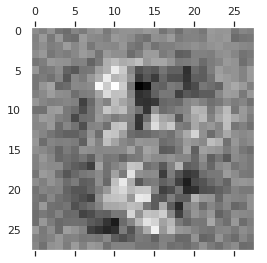

In [289]:
vmin, vmax = digit_recognition_neural_network.coefs_[0].min(), digit_recognition_neural_network.coefs_[0].max()
plt.matshow(digit_recognition_neural_network.coefs_[0][:, 36].reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
plt.grid(False)

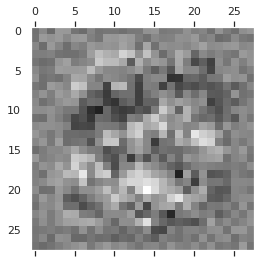

In [300]:
vmin, vmax = digit_recognition_neural_network.coefs_[0].min(), digit_recognition_neural_network.coefs_[0].max()
plt.matshow(digit_recognition_neural_network.coefs_[0][:, 49].reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
plt.grid(False)

Below we see plots of the coefficients for all 50 of our hidden neurons.

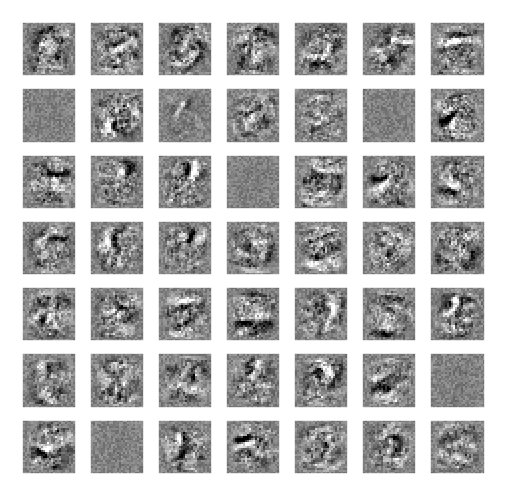

In [338]:
for i in range(1, 50):
    ax = plt.subplot(7, 7, i)
    vmin, vmax = digit_recognition_neural_network.coefs_[0].min(), digit_recognition_neural_network.coefs_[0].max()
    ax.matshow(digit_recognition_neural_network.coefs_[0][:, i].reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.grid(False)